In [ ]:
#데이터 로드와 정규화
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X /255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Conv2D 레이어로 컨볼루션 연산을 수행
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


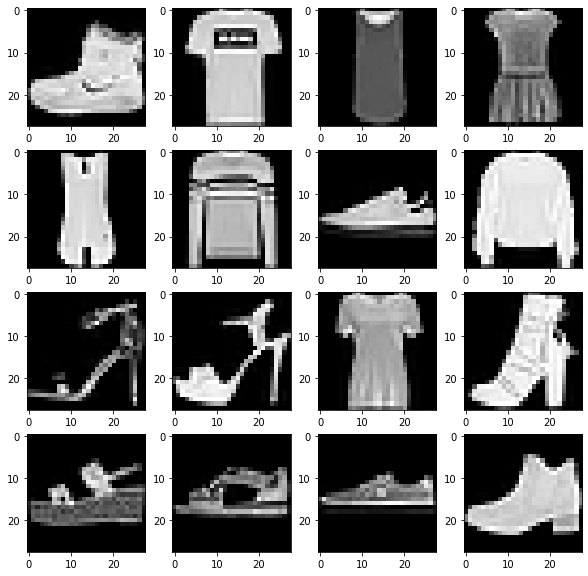

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
#데이터 확인 시각화
import matplotlib.pyplot as plt

#전체 그래프의 크기를 width = 10, height = 10으로 지정
plt.figure(figsize=(10, 10))
for c in range(16):
  #4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그린다. 1~16번째 칸을 채움
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

#훈련 데이터의 1~16번째 까지의 라벨 프린트
print(train_Y[:16])

In [ ]:
#컨볼루션 신경망 모델에서의 패러미터 수
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1),
                                                    kernel_size=(3,3), filters=16),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc940503a20>>

Epoch 1/25
1407/1407 [==============================] - 153s 108ms/step - loss: 0.4665 - accuracy: 0.8327 - val_loss: 0.3854 - val_accuracy: 0.8619
Epoch 2/25
1407/1407 [==============================] - 151s 108ms/step - loss: 0.3371 - accuracy: 0.8768 - val_loss: 0.3589 - val_accuracy: 0.8703
Epoch 3/25
1407/1407 [==============================] - 153s 109ms/step - loss: 0.2808 - accuracy: 0.8961 - val_loss: 0.3618 - val_accuracy: 0.8718
Epoch 4/25
1407/1407 [==============================] - 153s 109ms/step - loss: 0.2436 - accuracy: 0.9092 - val_loss: 0.3936 - val_accuracy: 0.8735
Epoch 5/25
1407/1407 [==============================] - 152s 108ms/step - loss: 0.2091 - accuracy: 0.9218 - val_loss: 0.4342 - val_accuracy: 0.8711
Epoch 6/25
1407/1407 [==============================] - 151s 108ms/step - loss: 0.1838 - accuracy: 0.9314 - val_loss: 0.4818 - val_accuracy: 0.8691
Epoch 7/25
1407/1407 [==============================] - 152s 108ms/step - loss: 0.1644 - accuracy: 0.9377 - val_

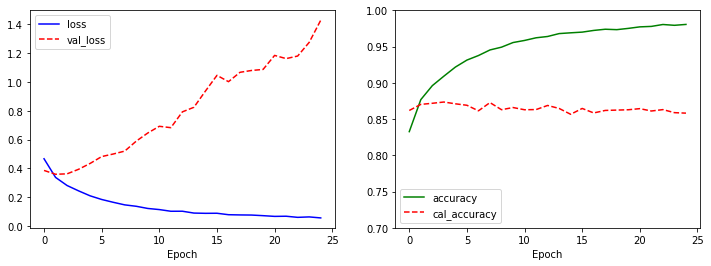

AttributeError: ignored

In [ ]:
#컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='cal_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.vealuate(test_X, test_Y, verbose=0)

In [ ]:
#풀링 레이어 추가로 패러미터 수 감소
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
                             tf.keras.layers.MaxPool2D(strides=(2,2)),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
                             tf.keras.layers.MaxPool2D(strides=(2,2)),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.3),
                             tf.keras.layers.Dense(units=10, activation='softmax')


])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 44s 31ms/step - loss: 0.5314 - accuracy: 0.8088 - val_loss: 0.3782 - val_accuracy: 0.8613
Epoch 2/25
1407/1407 [==============================] - 42s 30ms/step - loss: 0.3656 - accuracy: 0.8669 - val_loss: 0.3361 - val_accuracy: 0.8791
Epoch 3/25
1407/1407 [==============================] - 42s 30ms/step - loss: 0.3205 - accuracy: 0.8847 - val_loss: 0.3041 - val_accuracy: 0.8889
Epoch 4/25
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2944 - accuracy: 0.8926 - val_loss: 0.3135 - val_accuracy: 0.8844
Epoch 5/25
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2681 - accuracy: 0.9010 - val_loss: 0.3089 - val_accuracy: 0.8893
Epoch 6/25
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2535 - accuracy: 0.9074 - val_loss: 0.2943 - val_accuracy: 0.8943
Epoch 7/25
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2373 - accuracy: 0.9131 - val_loss: 0.2926 -

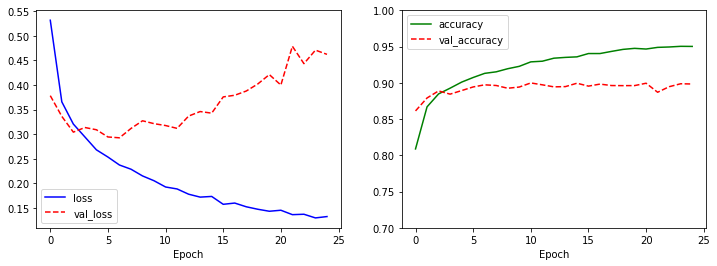

[0.48481884598731995, 0.8949999809265137]

In [ ]:
#훈련과 시각화
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
#Deep CNN 모델 적용
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),

                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 256)        

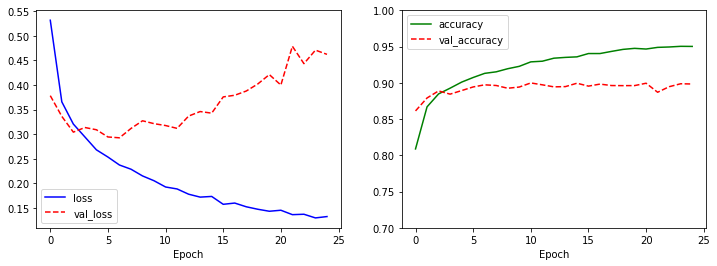

[2.3020801544189453, 0.09049999713897705]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)